In [2]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(dplyr)
library(Matrix)
library(reticulate)
library(patchwork) #wrap_plots
#library(magrittr)
#library(CARD)
library(gtools)
library(scatterpie)
library(viridis)
library(cols4all)

In [4]:
CIN3 <- readRDS("../data/CC2CC8_CIN3_merge_celltype_UCell_pct1_top10.rds")
CA <- readRDS("../data/CC7CC38_CA_Normal_mergecelltype_UCell_pct1_top10.rds")

In [7]:
DefaultAssay(CIN3) <- "Spatial"
DefaultAssay(CA) <- "Spatial"

In [9]:
spatial_corr <- CIN3@images$slice1@coordinates[,c('col', 'row')]
colnames(spatial_corr) <- c('s_1', 's_2')
spatial_corr <- as.matrix(spatial_corr)
CIN3[["spatial"]] <- CreateDimReducObject(embeddings=spatial_corr, key = "s_", assay = "Spatial")

spatial_corr <- CA@images$slice1@coordinates[,c('col', 'row')]
colnames(spatial_corr) <- c('s_1', 's_2')
spatial_corr <- as.matrix(spatial_corr)
CA[["spatial"]] <- CreateDimReducObject(embeddings=spatial_corr, key = "s_", assay = "Spatial")

In [22]:
pt.size <- 0.6
p1 <- FeaturePlot(CIN3, reduction="spatial", features = "DNMT1", pt.size = pt.size,
                  min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()# + coord_fixed(ratio=1)

p11 <- FeaturePlot(CA, reduction="spatial", features = "DNMT1", pt.size = pt.size,
                   min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()


p2 <- FeaturePlot(CIN3, reduction="spatial", features = "TMEM173", pt.size = pt.size) +#,min.cutoff = "q03", max.cutoff = "q99"
    scale_y_reverse() + 
    
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()

p22 <- FeaturePlot(CA, reduction="spatial", features = "TMEM173", pt.size = pt.size,
                   min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()


p3 <- FeaturePlot(CIN3, reduction="spatial", features = "KRT6A", pt.size = pt.size,
                  min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()# + coord_fixed(ratio=1)

p33 <- FeaturePlot(CA, reduction="spatial", features = "KRT6A", pt.size = pt.size,
                   min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()

p4 <- FeaturePlot(CIN3, reduction="spatial", features = "CCND1", pt.size = pt.size,
                  min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()# + coord_fixed(ratio=1)

p44 <- FeaturePlot(CA, reduction="spatial", features = "CCND1", pt.size = pt.size,
                   min.cutoff = "q03", max.cutoff = "q99") +#
    scale_y_reverse() + 
    scale_shape_manual(values = c(6))+
    scale_colour_viridis(option="H") + theme_void()

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour,

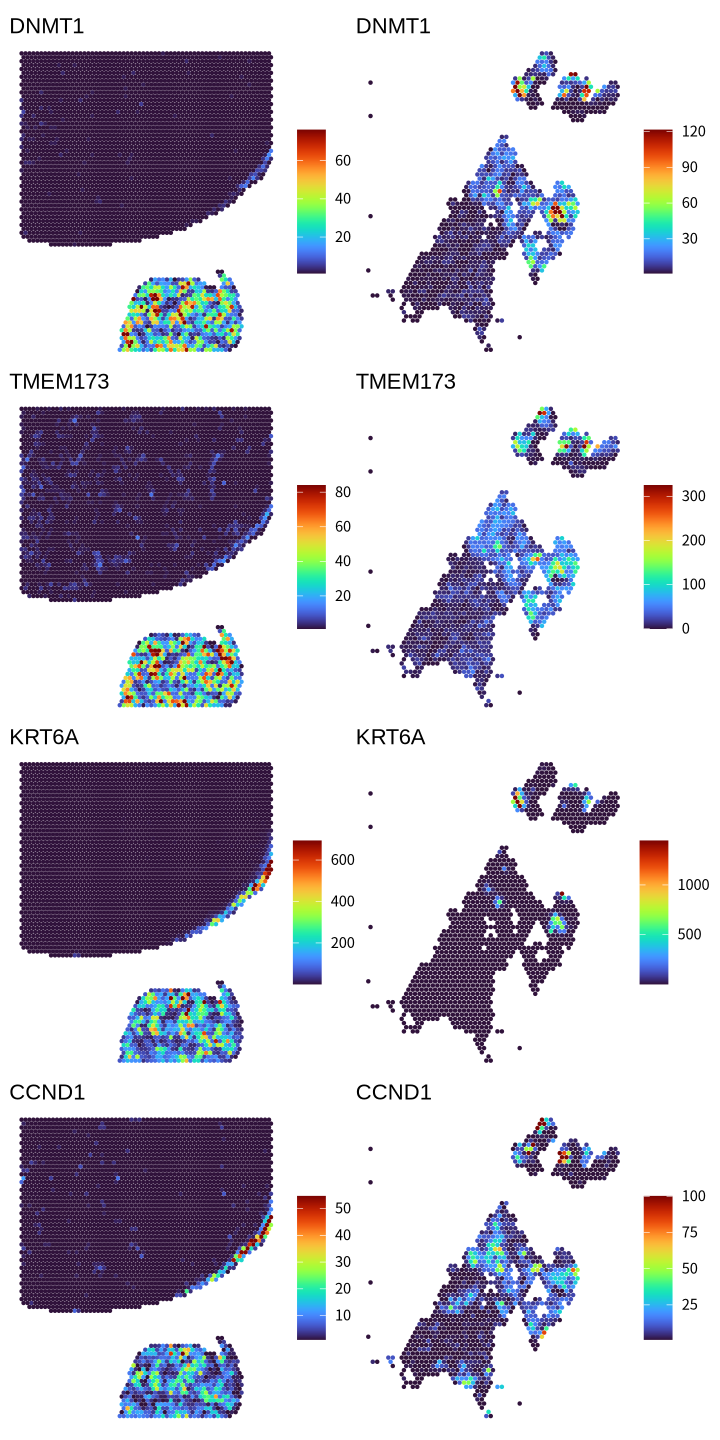

In [23]:
p <- p11+p1+p22+p2+p33+p3+p44+p4 + plot_layout(ncol=2, nrow=4)
options(repr.plot.width=6, repr.plot.height=12)
p

In [25]:
ggsave("spatial_exp_CCND1_KRT6A_DNMT1_TMEM173.pdf", p, w=6, h=12)